<a href="https://colab.research.google.com/github/epsilon11101/FACE_RECOGNITION/blob/main/faceanalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/EMOTIONS/images.zip -d /content/drive/MyDrive/EMOTIONS/images

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/9898.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/10437.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/11754.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/12737.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/16374.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/16440.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/16559.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/16930.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/21500.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/22944.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/297.jpg  
  inflating: /content/drive/MyDrive/EMOTIONS/images/validation/fear/3110

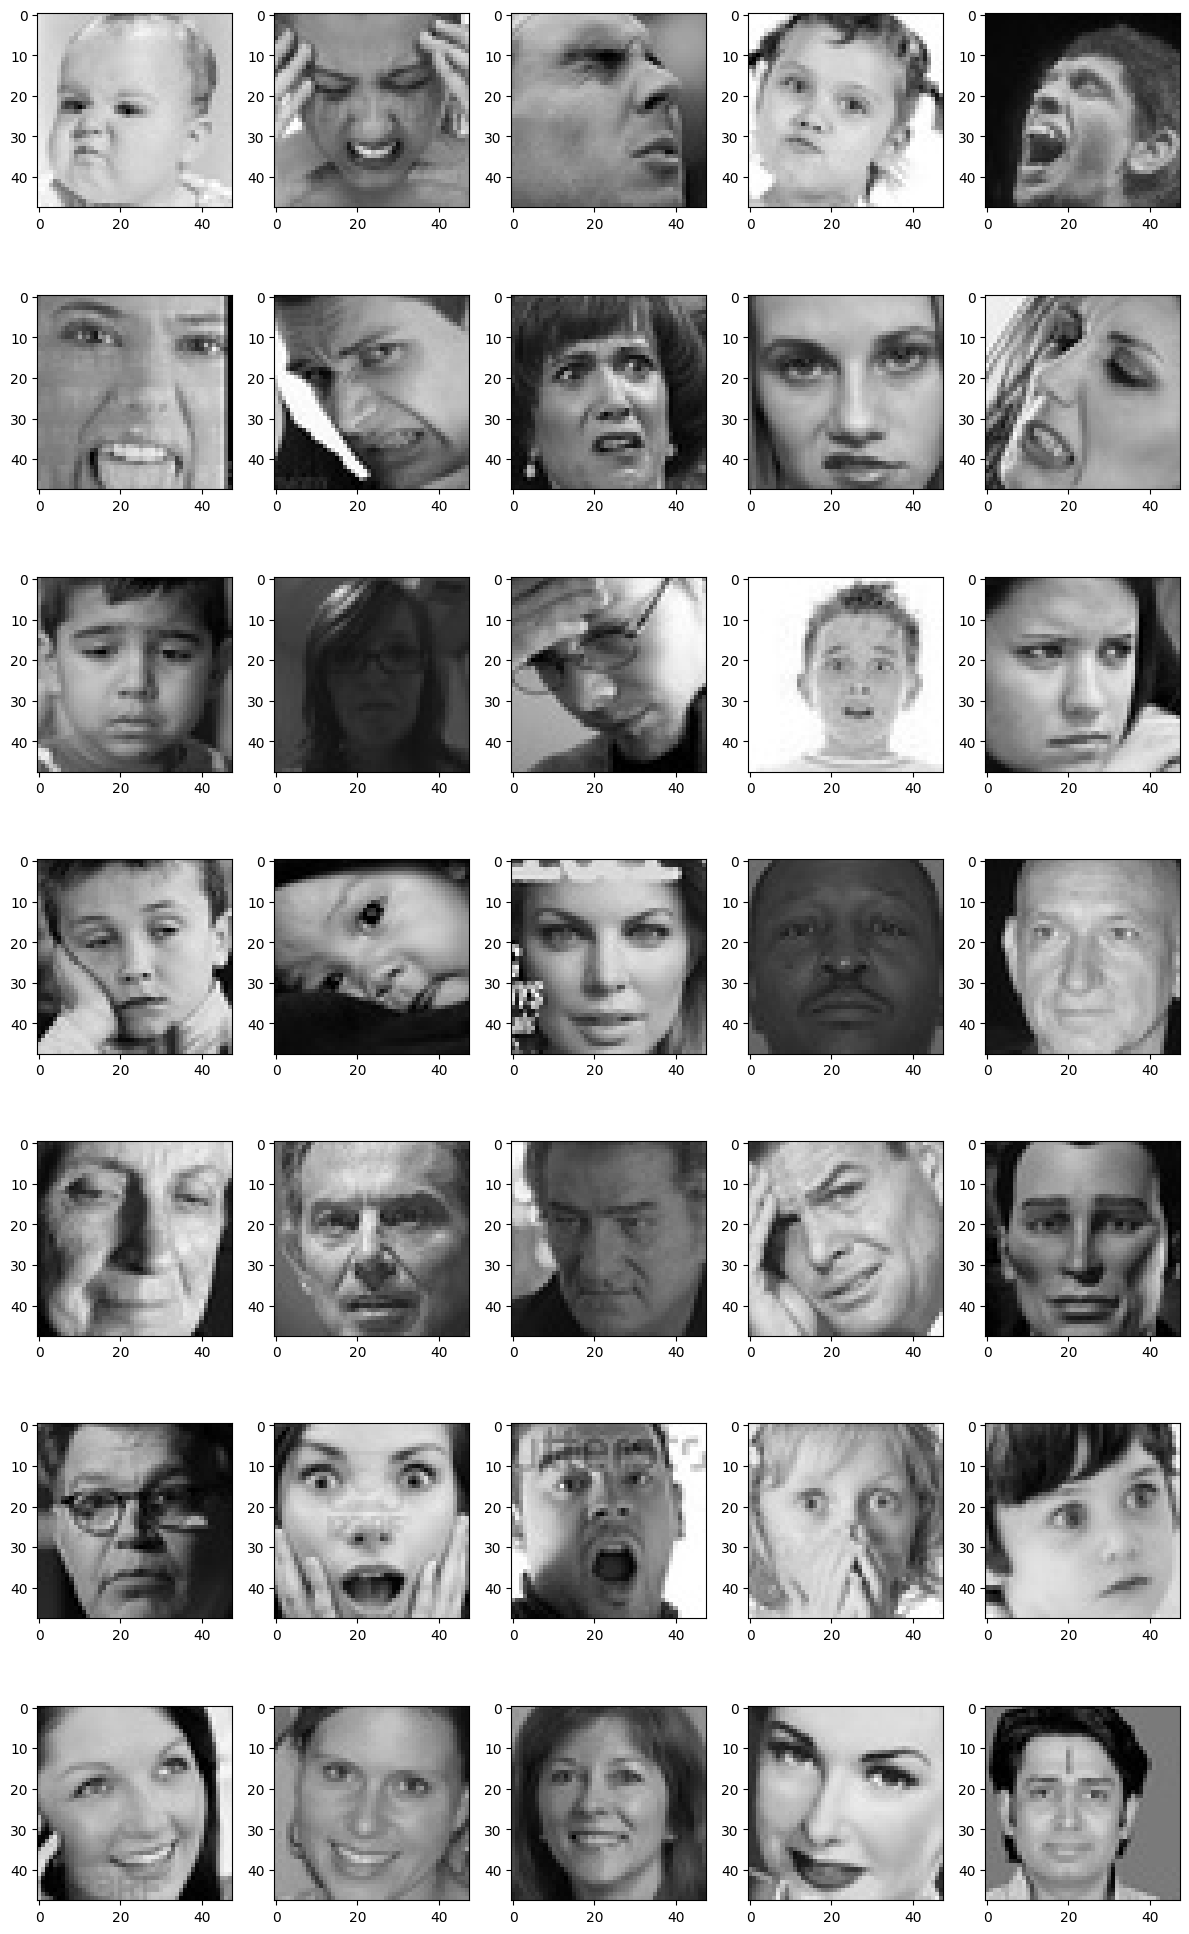

In [3]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/drive/MyDrive/EMOTIONS/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()


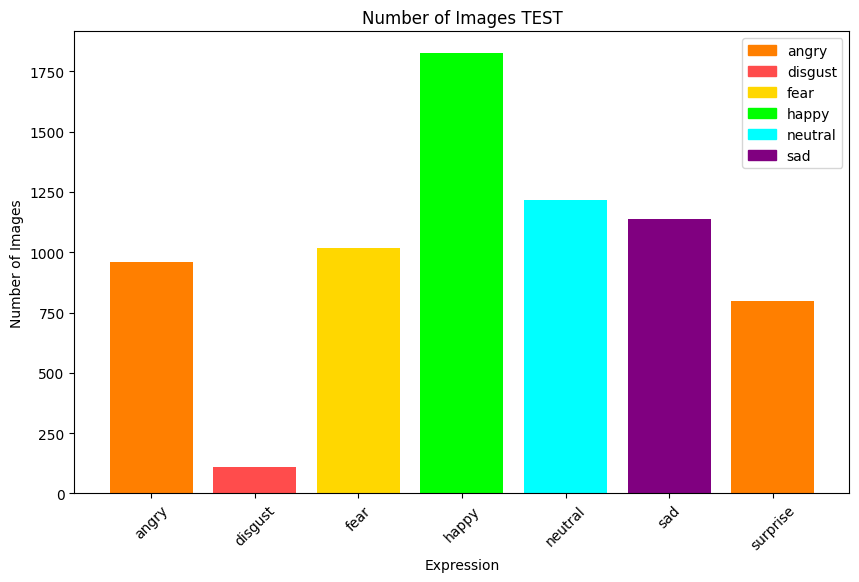

In [8]:
import matplotlib.pyplot as plt

counts = []
expressions = []

for expression in os.listdir(base_path + "validation"):
    count = len(os.listdir(base_path + "validation/" + expression))
    counts.append(count)
    expressions.append(expression)

# Define a list of vibrant colors
colors = ['#FF7F00', '#FF4C4C', '#FFD700', '#00FF00', '#00FFFF', '#800080']

plt.figure(figsize=(10, 6))
bars = plt.bar(expressions, counts, color=colors)

plt.xlabel('Expression')
plt.ylabel('Number of Images')
plt.title('Number of Images TEST')
plt.xticks(rotation=45)

# Add a legend with the corresponding colors
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_labels, expressions)

plt.show()


In [9]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
%%time

# number of epochs to train the NN
epochs = 22

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )
model.save("/content/drive/MyDrive/EMOTIONS/finalModel/model.h5")

<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/22
 28/225 [==>...........................] - ETA: 4:47:17 - loss: 2.2228 - accuracy: 0.1811

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


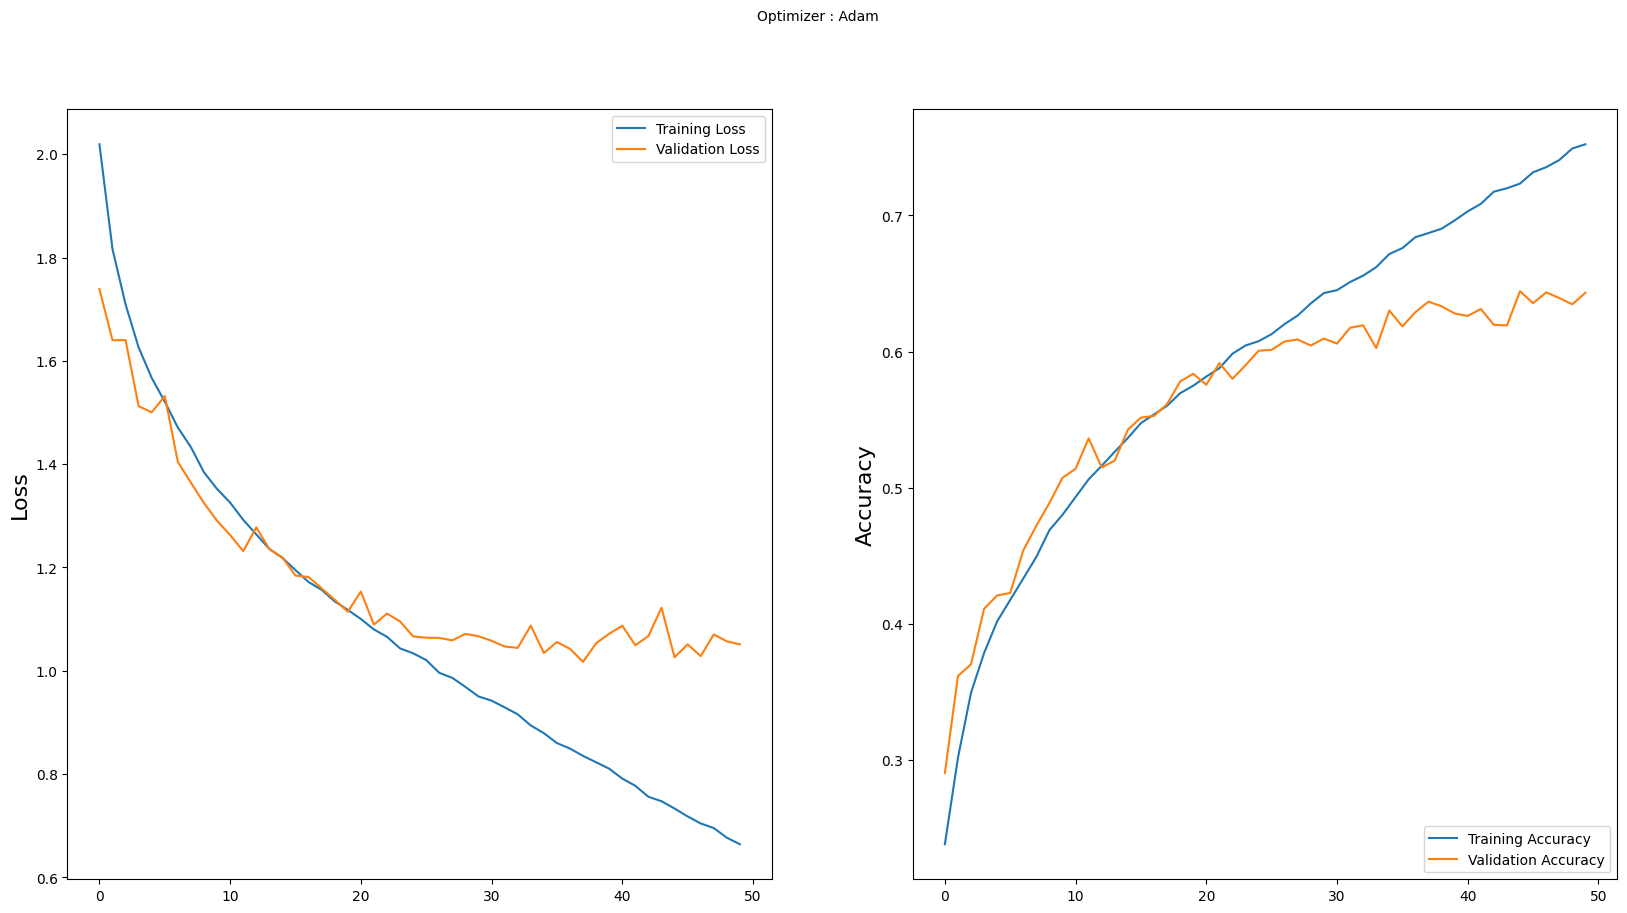

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<ipython-input-31-f2a7419b489f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)


<Figure size 640x480 with 0 Axes>

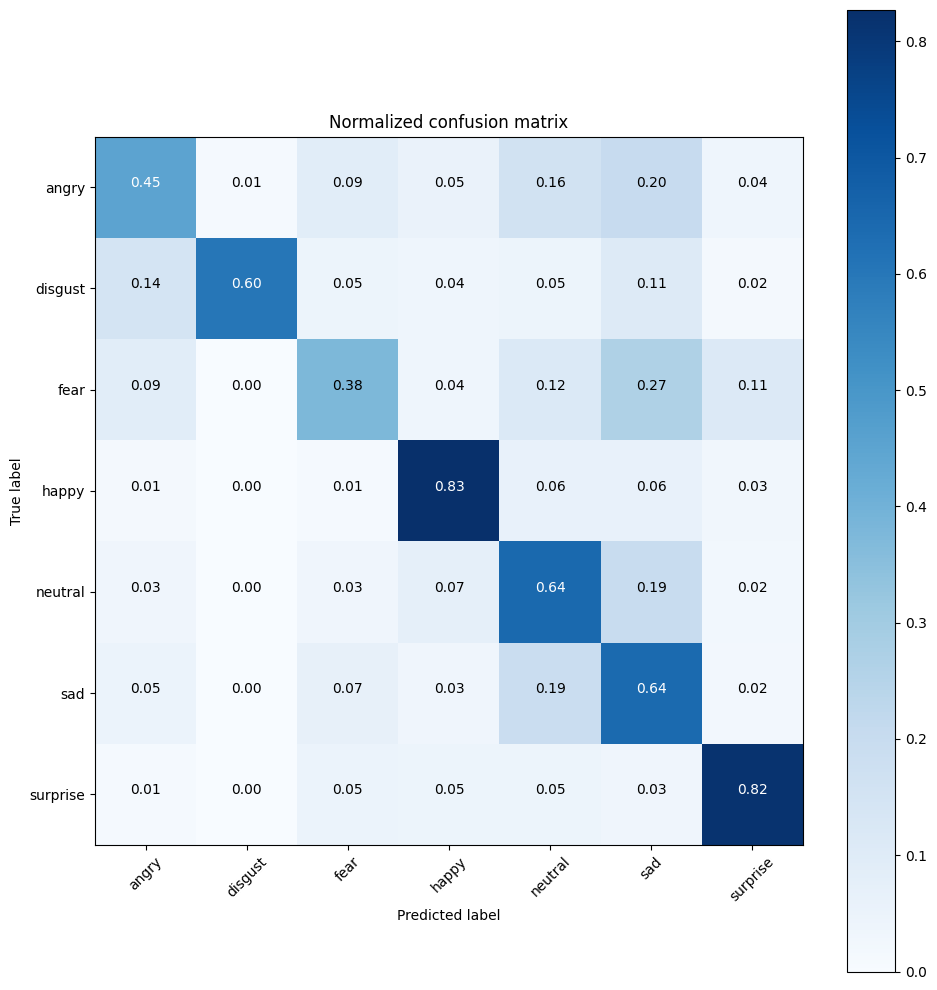

In [ ]:
# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

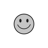

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]]
1/1 [==============================] - 0s 247ms/step
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Predicted Emotion: happy


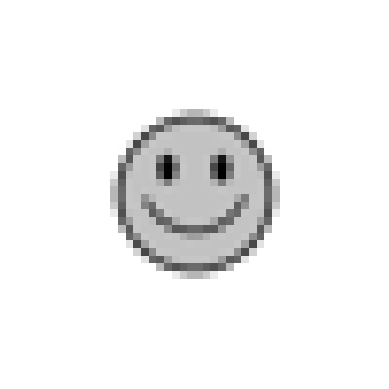

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from PIL import Image

# Cargar el modelo entrenado
model = load_model("/content/drive/MyDrive/EMOTIONS/finalModel/model.h5")

# Ruta de la imagen de prueba
img_path = "/content/drive/MyDrive/EMOTIONS/customIMG/happy2.jpg"

# Tamaño de la imagen
pic_size = 48

# Redimensionar la imagen y convertirla a escala de grises
img = Image.open(img_path)
img_resized = img.resize((pic_size, pic_size)).convert("L")
img_resized.show()

# Preprocesar la imagen de prueba
img_array = np.array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
print(img_array[0:1])
# Realizar la predicción con el modelo cargado
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions[0])

# Obtener la etiqueta de la clase predicha
class_names = train_generator.class_indices
print(class_names)
for class_label, class_index in class_names.items():
    if class_index == predicted_class:
        predicted_class_label = class_label
        break

# Imprimir la clase predicha
print("Predicted Emotion:", predicted_class_label)

# Visualizar la imagen de prueba
plt.imshow(img_resized, cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 49.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Suc

In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/EMOTIONS/finalModel/model.h5 /content/drive/MyDrive/EMOTIONS/JSModel_tfjs2


2023-07-10 23:12:22.807248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
